# Face Recognition using Haar or LBP Cascade Classifiers

## Libraries Import

In [1]:
import os
import time

import cv2
import numpy as np
import matplotlib.pyplot as pyplot

## Configuration

In [2]:
IMAGES_FOLDER = "images/"
READ_IMAGE = IMAGES_FOLDER + "6.png"
MODELS_FOLDER = "models/"
HAAR_FRONTAL_FACE_CLASSIFIER = os.path.join(os.getcwd(), MODELS_FOLDER + "haarcascade_frontalface_default.xml")
HAAR_EYES_CLASSIFIER = os.path.join(os.getcwd(), MODELS_FOLDER + "haarcascade_eye.xml")
LBP_FRONTAL_FACE_CLASSIFIER = os.path.join(os.getcwd(), MODELS_FOLDER + "lbpcascade_frontalface.xml")
SCALE_FACTOR = 1.2
MIN_NEIGHBORS = 8
HIGHLIGHT_COLOR = (255, 0, 0)
FACE_BORDER_WIDTH = 5
EYES_BORDER_WIDTH = 1

## Image Reading

In [3]:
image = cv2.imread(READ_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
print("The type of the image is {}, having the shape of {}.".format(type(image), image.shape))

The type of the image is <class 'numpy.ndarray'>, having the shape of (512, 512, 3).


In [5]:
def plot_image(image: np.array, title: str = None, cmap: str = None) -> None:
    pyplot.imshow(image, cmap=cmap)
    if title:
        pyplot.title(title)
    pyplot.axis("off")
    pyplot.show(cmap)

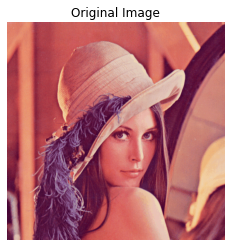

In [6]:
plot_image(image, "Original Image")

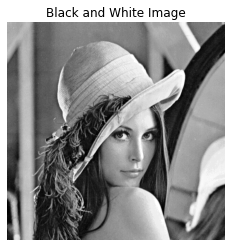

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plot_image(gray_image, title="Black and White Image", cmap="gray")

## Face Detection with Haar Cascade Classifier

In [8]:
def detect_faces(image: np.array, model_filename: str, plot_result: bool = True, return_first: bool = False) -> np.array:
    frontal_face_classifier = cv2.CascadeClassifier(HAAR_FRONTAL_FACE_CLASSIFIER)

    labeled_image = np.copy(image)
    faces = frontal_face_classifier.detectMultiScale(image, scaleFactor=SCALE_FACTOR, minNeighbors=MIN_NEIGHBORS)
    if plot_result:
        for (x, y, width, height) in faces:
            labeled_image = cv2.rectangle(labeled_image, (x, y),(x + width, y + height), HIGHLIGHT_COLOR, FACE_BORDER_WIDTH)

        plot_image(labeled_image, title="Detected Face")

    if return_first:
        (x, y, width, height) = faces[0]
        cropped_image = np.copy(image)
        cropped_image = cropped_image[y:y + height, x:x + width]

        return cropped_image

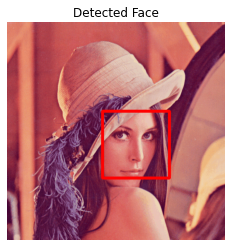

In [9]:
cropped_image = detect_faces(image, HAAR_FRONTAL_FACE_CLASSIFIER, return_first=True)

## Eyes Detection with Haar Cascade Classifier

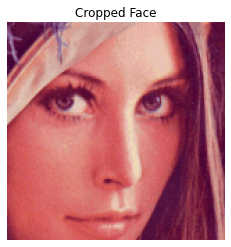

In [10]:
plot_image(cropped_image, title="Cropped Face")

In [11]:
frontal_face_classifier = cv2.CascadeClassifier(HAAR_EYES_CLASSIFIER)

In [12]:
labeled_image = np.copy(cropped_image)
eyes = frontal_face_classifier.detectMultiScale(cropped_image)
for (x, y, width, height) in eyes:
    labeled_image = cv2.rectangle(labeled_image, (x, y),(x + width, y + height), HIGHLIGHT_COLOR, EYES_BORDER_WIDTH)

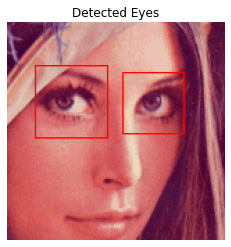

In [13]:
plot_image(labeled_image, title="Detected Eyes")

## Face Detection with LBP Cascade Classifier

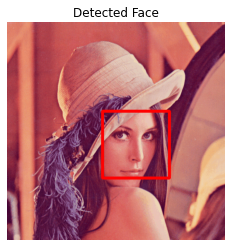

In [14]:
detect_faces(image, LBP_FRONTAL_FACE_CLASSIFIER)

## Time Comparison between Haar and LBP

In [15]:
images = os.listdir(IMAGES_FOLDER)
images = [os.path.join(IMAGES_FOLDER, image) for image in images]
images = [cv2.imread(image) for image in images]
total_images = len(images)

In [16]:
for classifier in [HAAR_FRONTAL_FACE_CLASSIFIER, LBP_FRONTAL_FACE_CLASSIFIER]:
    initial_time = time.process_time()

    for image in images:
        detect_faces(image, classifier, False)

    elapsed_time = time.process_time() - initial_time
    print("The elapsed time with the '{}' classifier is {:.2f}".format(os.path.basename(classifier), elapsed_time))

The elapsed time with the 'haarcascade_frontalface_default.xml' classifier is 3.57
The elapsed time with the 'lbpcascade_frontalface.xml' classifier is 3.42
